In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r"C:\Users\a\OneDrive\Desktop\Project\DATA\data\student-mat.csv", sep = ";")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
data = data[["G1","G2","G3","studytime","failures","absences"]]
data

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4
...,...,...,...,...,...,...
390,9,9,9,2,2,11
391,14,16,16,1,0,3
392,10,8,7,1,3,3
393,11,12,10,1,0,0


In [4]:
predict = "G3"

In [13]:
X = np.array(data.drop(columns = predict))
y = np.array(data[predict])

len(X), len(y)

(395, 395)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
acurracy = model.score(X_test,y_test)
acurracy

0.7609298503433677

In [7]:
model.coef_, model.intercept_

(array([ 0.13779371,  0.98188762, -0.14234284, -0.28691902,  0.0300431 ]),
 -1.3474972752596042)

In [8]:
prediction = model.predict(X_test)
prediction

array([ 9.14113973,  9.55155811, 10.60660412, 18.2464935 , 15.70113957,
       14.74510669, 15.28320932,  5.91866731,  8.70291507,  5.51625703,
        7.32526766, 11.87759109,  9.55488162, 15.22312313,  5.18954623,
       12.98376048, 14.24578464, 16.41596284,  8.63973069,  9.48692279,
       10.95989905,  3.81254924,  4.45666189,  7.23846188,  7.65683187,
       15.6313047 , -0.81220318, 10.60660412,  8.00716406, 14.21451592,
       15.64105338,  9.28449376,  7.50019469, 11.80399296, 12.73785539,
       13.18164038,  7.38535385, 13.34427762,  8.50048604,  7.76349232])

In [9]:
for x in range(len(prediction)):
    print(f"{prediction[x]}, [G1, G2, studytime, failures, absences] = {X_test[x]}, actual_val =  {y_test[x]}")

9.141139732046696, [G1, G2, studytime, failures, absences] = [11  9  2  0 14], actual_val =  9
9.55155811461655, [G1, G2, studytime, failures, absences] = [ 8 10  1  0  4], actual_val =  10
10.606604119134415, [G1, G2, studytime, failures, absences] = [10 11  2  0  2], actual_val =  12
18.246493503921805, [G1, G2, studytime, failures, absences] = [16 18  2  0  0], actual_val =  18
15.70113957324597, [G1, G2, studytime, failures, absences] = [17 15  1  0  4], actual_val =  16
14.745106687728375, [G1, G2, studytime, failures, absences] = [13 15  3  0  0], actual_val =  15
15.283209321128636, [G1, G2, studytime, failures, absences] = [15 15  2  0  4], actual_val =  15
5.918667314010702, [G1, G2, studytime, failures, absences] = [7 7 2 1 0], actual_val =  0
8.702915071770837, [G1, G2, studytime, failures, absences] = [10  9  2  0  4], actual_val =  9
5.516257026858666, [G1, G2, studytime, failures, absences] = [7 6 1 0 5], actual_val =  7
7.325267657348318, [G1, G2, studytime, failures, ab

Text(0, 0.5, 'Final Grade')

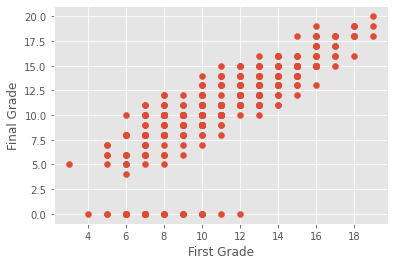

In [10]:
style.use("ggplot")

plt.scatter(data["G1"], data["G3"])
plt.xlabel("First Grade")
plt.ylabel("Final Grade")

Text(0, 0.5, 'Final Grade')

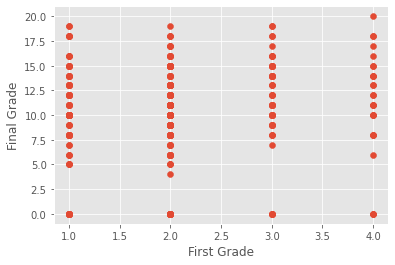

In [11]:
plt.scatter(data["studytime"], data["G3"])
plt.xlabel("First Grade")
plt.ylabel("Final Grade")

In [12]:
len(X_test), len(y_test)

(40, 40)